# COVID-19 Impact Analysis Project

This project analyzes the impact of COVID-19 using various statistical and visualization techniques. Below is a structured summary of the project's content, including key sections and code snippets.

## Import Libraries

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import Data

In [59]:
covid_data = pd.read_csv("metadata.xls")
covid_data

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


## Statistical Summary

In [3]:
## Statistical Summary for numerical variables
covid_data.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


In [10]:
## Summary table of categorical variables
covid_data.describe(include='object')

,Country/Region,WHO Region
count,187,187
unique,187,6
top,Afghanistan,Europe
freq,1,56


## Missing Value Analysis

In [4]:
covid_data.isnull().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

## Outlier Analysis

In [5]:
# Selecting Numeric Columns
numeric_cols = covid_data.select_dtypes(include=['int64', 'float64']).columns

In [6]:
for col in numeric_cols:
    Q1 = covid_data[col].quantile(0.25)       # 1. quartile
    Q3 = covid_data[col].quantile(0.75)       # 3. quartile
    IQR = Q3 - Q1                     # Interquartile Range

    lower_bound = Q1 - 1.5 * IQR      # Alt sınır
    upper_bound = Q3 + 1.5 * IQR      # Üst sınır

    outliers = covid_data[(covid_data[col] < lower_bound) | (covid_data[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")

Confirmed: 24 outliers
Deaths: 33 outliers
Recovered: 25 outliers
Active: 32 outliers
New cases: 25 outliers
New deaths: 28 outliers
New recovered: 31 outliers
Deaths / 100 Cases: 10 outliers
Recovered / 100 Cases: 0 outliers
Deaths / 100 Recovered: 18 outliers
Confirmed last week: 23 outliers
1 week change: 22 outliers
1 week % increase: 8 outliers


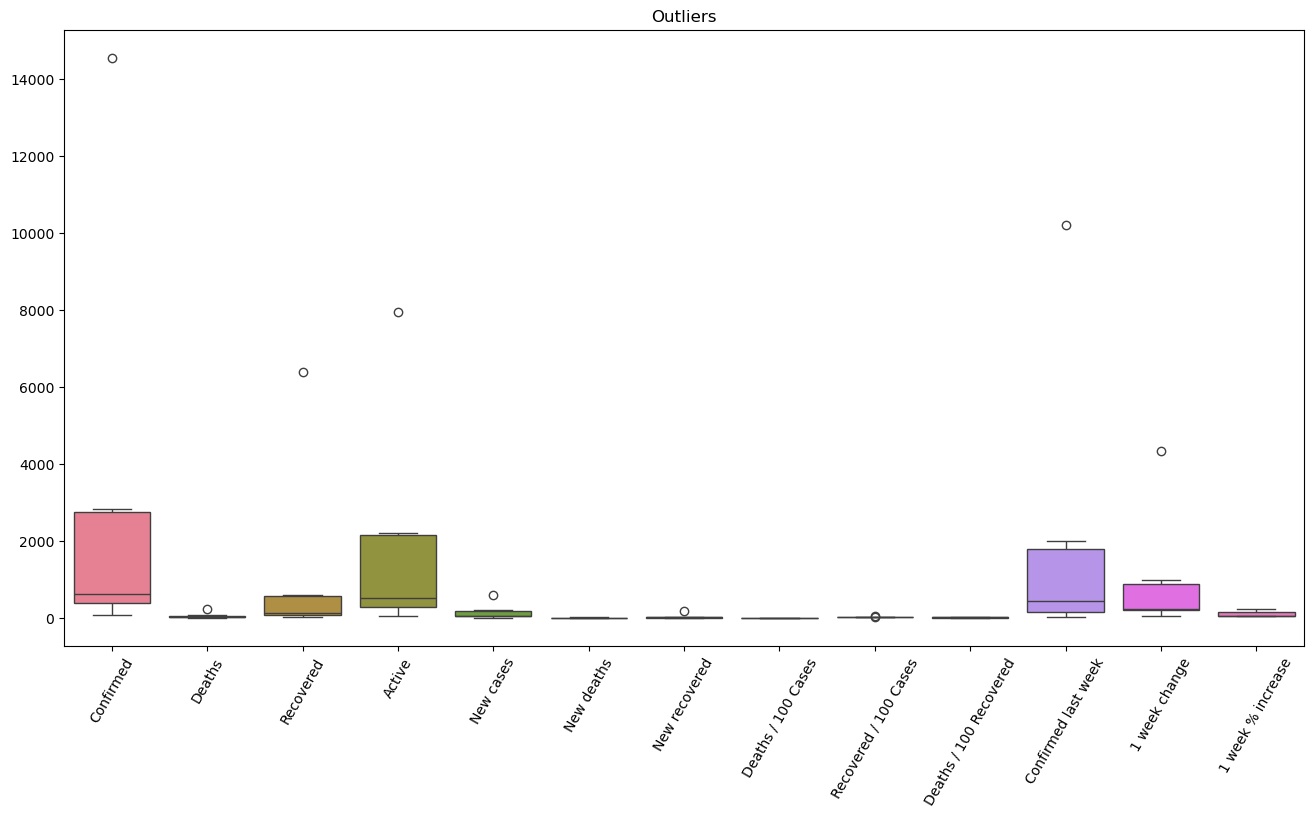

In [9]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=outliers)
plt.title("Outliers")
plt.xticks(rotation=60)
plt.show()

Most of them,outliers, may be meaningful for our data analysis. So, we will keep them within dataset.

## Visualization

#### Top 10 countries by total number of cases

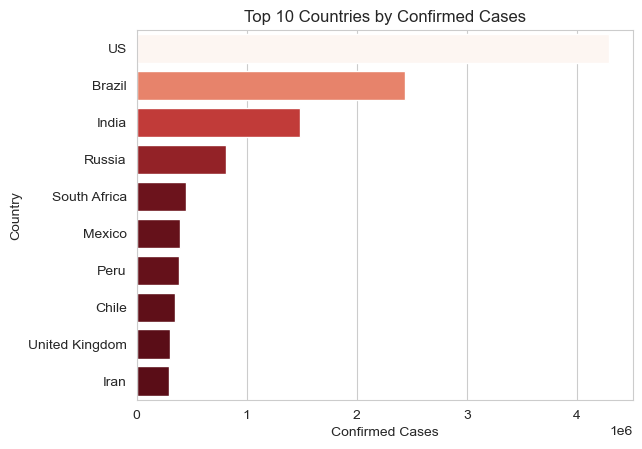

In [54]:
top10 = covid_data.sort_values("Confirmed", ascending=False).head(10)
sns.barplot(data=top10, x="Confirmed", y="Country/Region", hue="Confirmed", palette="Reds_r", legend=False)
plt.title("Top 10 Countries by Confirmed Cases")
plt.xlabel("Confirmed Cases")
plt.ylabel("Country")
plt.show()

A horizontal bar chart highlights the countries with the highest number of confirmed cases. Countries like the USA, Brazil, and India appear at the top, indicating severe outbreaks.

#### Total Death Count Based On WHO Region

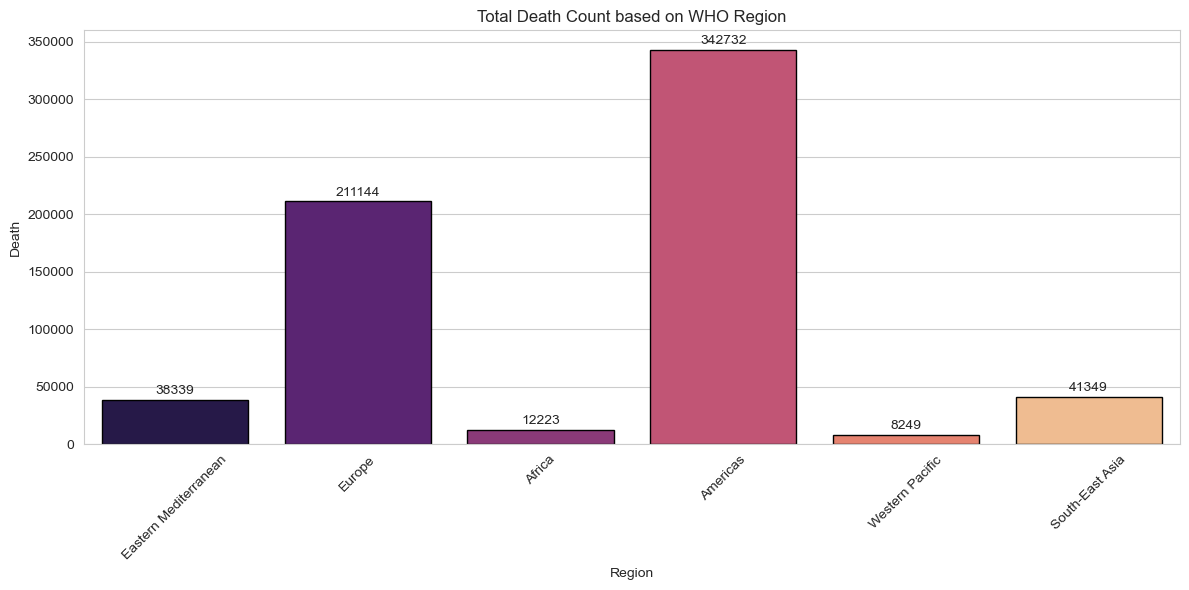

In [47]:
plt.figure(figsize=(12, 6))

ax = sns.barplot(data=covid_data, x='WHO Region', y='Deaths', hue='WHO Region', estimator=sum, errorbar=None, palette="magma", legend=False, edgecolor='black' )

# to write total count on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=2, fontsize=10)


plt.title("Total Death Count based on WHO Region")
plt.xticks(rotation=45)
plt.xlabel("Region")
plt.ylabel("Death")
plt.tight_layout()
plt.show()

According to the barchart above the most death cases were happened in America region with 342732, followed by Europe with 211144.Western Pasific also has the lowest number of cases.

#### Visualization of Deaths / 100 Cases, Recovered / 100 Cases, Deaths / 100 Recovered

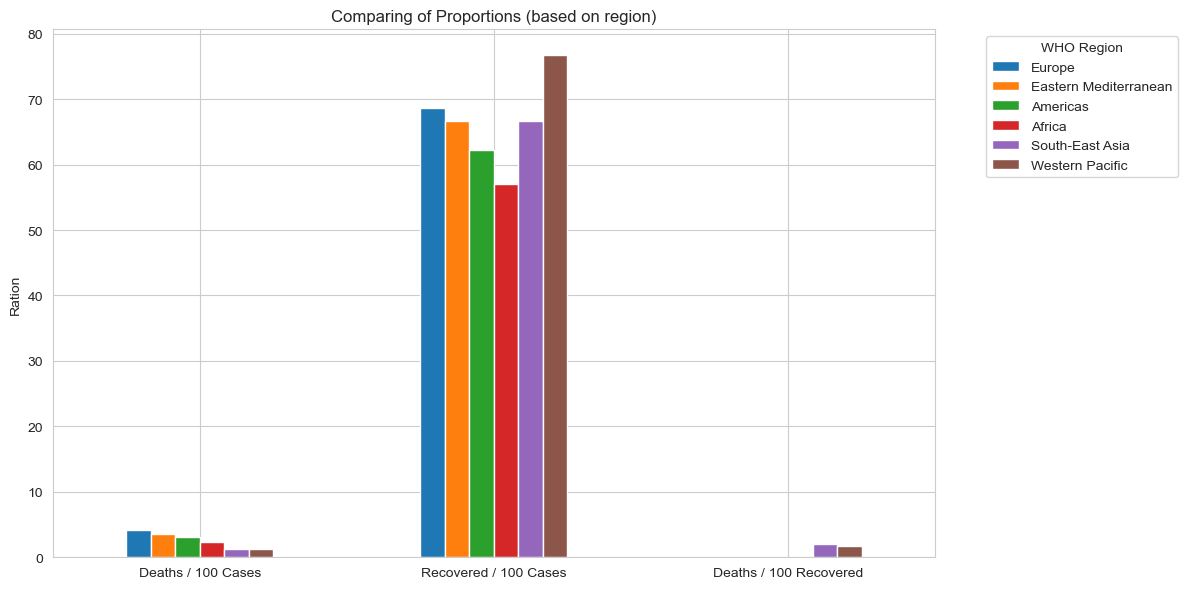

In [58]:
metrics = ['Deaths / 100 Cases', 'Recovered / 100 Cases','Deaths / 100 Recovered']
region_means = covid_data.groupby('WHO Region')[metrics].mean().sort_values(by='Deaths / 100 Cases', ascending=False)


region_means.T.plot(kind='bar', figsize=(12, 6))
plt.title("Comparing of Proportions (based on region)")
plt.ylabel("Ration")
plt.xticks(rotation=0)
plt.legend(title="WHO Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


The bar chart above illustrates the average proportions of key COVID-19 metrics across different WHO regions:

- Deaths / 100 Cases → Mortality rate per case
- Recovered / 100 Cases → Recovery rate per case
- Deaths / 100 Recovered → Mortality rate compared to recovered


🧠 Observations:

- Recovered / 100 Cases is consistently high across all regions, with the Western Pacific region showing the highest recovery rate, approaching nearly 78%.  

- The Deaths / 100 Cases ratio is lowest in Western Pacific, indicating relatively better outcomes in terms of survival compared to other regions.  

- Africa and Americas show relatively higher death rates per 100 cases compared to other regions.  

- The Deaths / 100 Recovered ratio mirrors the case fatality pattern, with Africa again showing higher values.



These proportions help reveal regional disparities in COVID-19 outcomes.

#### Active Cases by Region

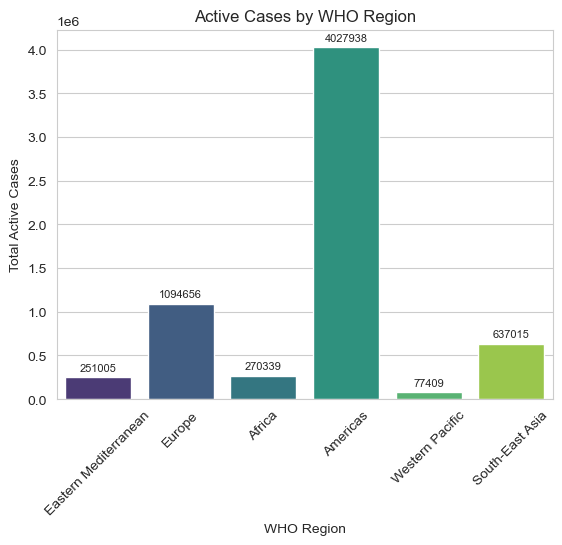

In [52]:
ax = sns.barplot(data=covid_data, x="WHO Region", y="Active", hue='WHO Region', estimator=sum, errorbar=None, legend=False, palette="viridis")

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3, fontsize= 8)

plt.title("Active Cases by WHO Region")
plt.xlabel("WHO Region")
plt.ylabel("Total Active Cases")
plt.xticks(rotation=45)
plt.show()


####

#### Confirmed vs Deaths

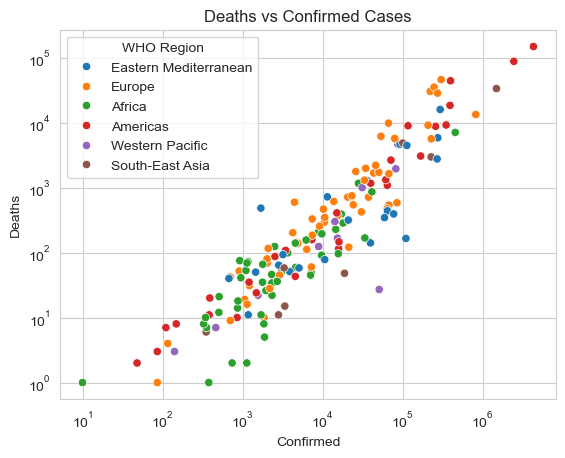

In [56]:
sns.scatterplot(data=covid_data, x="Confirmed", y="Deaths", hue="WHO Region")
plt.title("Deaths vs Confirmed Cases")
plt.xscale("log")
plt.yscale("log")
plt.show()


A scatter plot using log-log scale revealed a strong positive correlation between confirmed cases and deaths. WHO regions were color-coded to show geographical variation.